# Imports

In [1]:
import pandas as pd
import numpy as np
import scipy

# sklearn
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# deep learning
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Load DataSet

In [2]:
df1 = pd.DataFrame(pd.read_excel('./data/X_bp.xlsx', index_col=0))
df1

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                       3000.000000               220.000000  
1                       3000.000000               220.000000  
2                       3000.000000               220.000000  
3                       3000.000000               220.000000  
4                       3000.000000               220.000000  
...                             ...                      ...  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022                    2856.328932               194.754342  

[1023 rows x 10 columns]

In [3]:
df2 = pd.DataFrame(pd.read_excel('./data/X_nup.xlsx', index_col=0))
df2

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                      0     4.000000          57.000000
1                      0     4.000000          60.000000
2                      0     4.000000          70.000000
3                      0     5.000000          47.000000
4                      0     5.000000          57.000000
...                  ...          ...                ...
1035                  90     8.088111          47.759177
1036                  90     7.619138          66.931932
1037                  90     9.800926          72.858286
1038                  90    10.079859          65.519479
1039                  90     9.021043          66.920143

[1040 rows x 3 columns]

In [4]:
df = pd.concat([df1, df2], join='inner', axis=1)
df.sample(5)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
133                         3.953978       2056.299072            1428.382367   
629                         2.755190       1997.804519            1083.792646   
648                         2.759415       1880.682199            1323.934038   
308                         2.187945       1975.420548              31.534591   
812                         3.100291       1946.741033             641.846274   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
133                    45.122175                        24.830065   
629                   111.727884                        25.420647   
648                    72.181985                        26.274309   
308                    98.214899                        24.654336   
812                    76.370018                        21.668869   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
133                319.150465                     558.300421   
629                302.560383                     567.407012   
648                319.716057                     120.319022   
308                312.742047                     518.122918   
812                340.233627                     223.979311   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
133                             69.016483                    2574.676221   
629                             75.632045                    2464.374710   
648                             71.780725                    2699.851036   
308                             74.782273                    2004.835606   
812                             74.728272                    2564.872049   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
133               224.098203                   0     4.607330   
629               277.357598                  90     6.892019   
648               267.102907                  90     7.694833   
308               342.978472                   0     9.674629   
812               177.609047                  90     6.999142   

     Плотность нашивки  
133          66.668759  
629          55.521248  
648          56.364749  
308          60.163069  
812          59.739833

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

In [6]:
df_cor = df.corr()
df_cor

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.003841   
модуль упругости, ГПа                                        0.031700   
Количество отвердителя, м.%                                 -0.006445   
Содержание эпоксидных групп,%_2                              0.019766   
Температура вспышки, С_2                                    -0.004776   
Поверхностная плотность, г/м2                               -0.006272   
Модуль упругости при растяжении, ГПа                        -0.008411   
Прочность при растяжении, МПа                                0.024148   
Потребление смолы, г/м2                                      0.072531   
Угол нашивки, град                                          -0.031073   
Шаг нашивки                                                  0.036437   
Плотность нашивки                                           -0.004652   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.003841               0.031700   
Плотность, кг/м3                              1.000000              -0.009647   
модуль упругости, ГПа                        -0.009647               1.000000   
Количество отвердителя, м.%                  -0.035911               0.024049   
Содержание эпоксидных групп,%_2              -0.008278              -0.006804   
Температура вспышки, С_2                     -0.020695               0.031174   
Поверхностная плотность, г/м2                 0.044930              -0.005306   
Модуль упругости при растяжении, ГПа         -0.017602               0.023267   
Прочность при растяжении, МПа                -0.069981               0.041868   
Потребление смолы, г/м2                      -0.015937               0.001840   
Угол нашивки, град                           -0.068474              -0.025417   
Шаг нашивки                                  -0.061015              -0.009875   
Плотность нашивки                             0.080304               0.056346   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                         -0.006445   
Плотность, кг/м3                                        -0.035911   
модуль упругости, ГПа                                    0.024049   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                         -0.000684   
Температура вспышки, С_2                                 0.095193   
Поверхностная плотность, г/м2                            0.055198   
Модуль упругости при растяжении, ГПа                    -0.065929   
Прочность при растяжении, МПа                           -0.075375   
Потребление смолы, г/м2                                  0.007446   
Угол нашивки, град                                       0.038570   
Шаг нашивки                                              0.014887   
Плотность нашивки                                        0.017248   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.019766   
Плотность, кг/м3                                            -0.008278   
модуль упругости, ГПа                                       -0.006804   
Количество отвердителя, м.%                                 -0.000684   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.009769   
Поверхностная плотность, г/м2                               -0.012940   
Модуль упругости при растяжении, ГПа                         0.056828   
Прочность при растяжении, МПа                               -0.023899   
Потребление смолы, г/м2                                      0.015165   
Угол нашивки, град                                           0.008052   
Шаг нашивки                          

<Axes: >

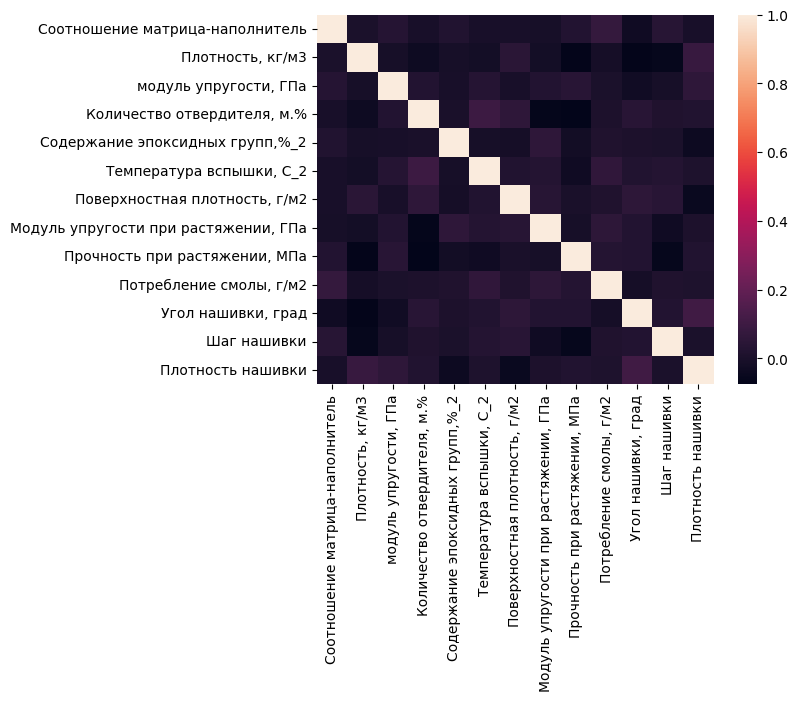

In [7]:
sns.heatmap(df_cor) 

In [8]:
# df_cor.loc[:, ] 
column = df_cor.columns.tolist()
column

['Соотношение матрица-наполнитель',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Содержание эпоксидных групп,%_2',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Модуль упругости при растяжении, ГПа',
 'Прочность при растяжении, МПа',
 'Потребление смолы, г/м2',
 'Угол нашивки, град',
 'Шаг нашивки',
 'Плотность нашивки']

<Figure size 1500x1500 with 0 Axes>

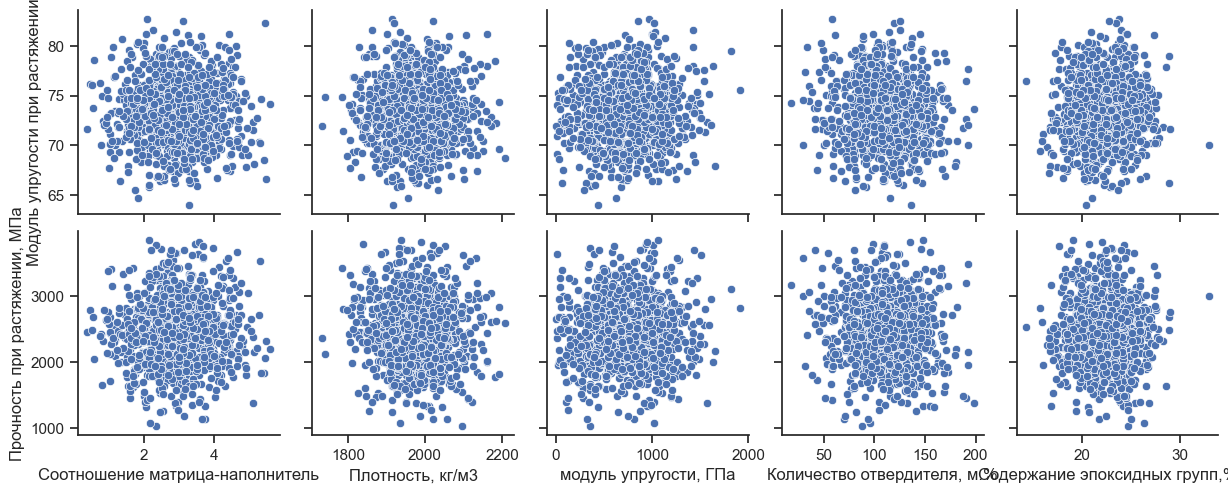

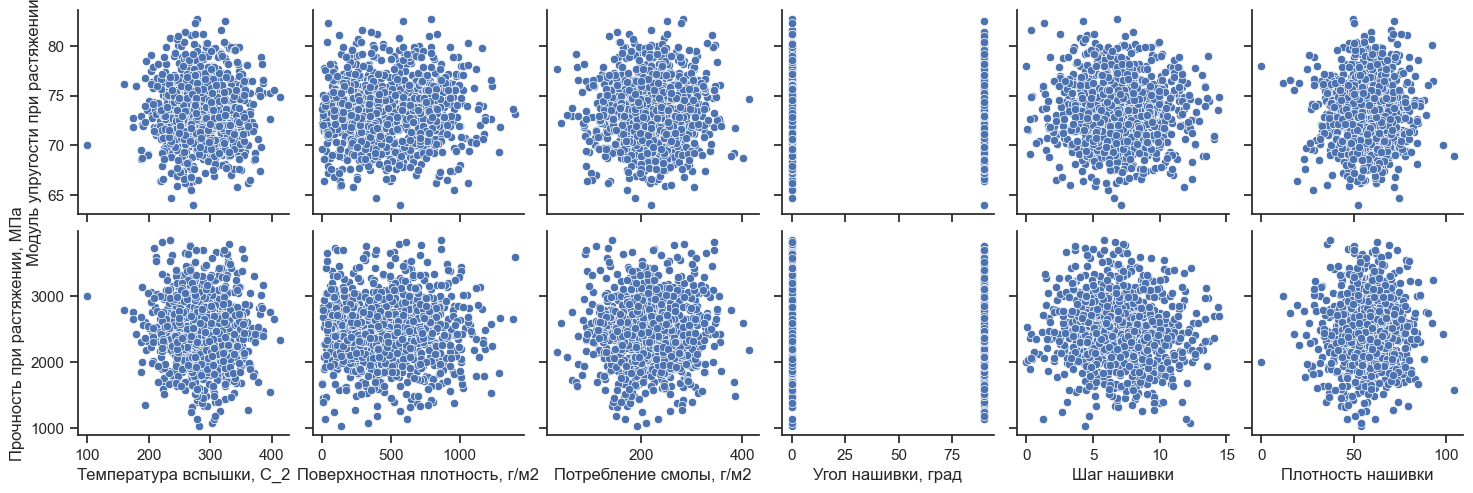

In [15]:
# fig, axs = plt.subplots(3, figsize = (5,5))
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(15,15))
sns.pairplot(df, y_vars=['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа'], x_vars=['Соотношение матрица-наполнитель',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Содержание эпоксидных групп,%_2'], diag_kind='kde') 
                 # diag_kind='kde', 
                 # plot_kws={'alpha': 0.2},  
                 # plot_kws=dict(s=80, edgecolor="white", linewidth=2.5),
                 # height=10, 
                 # aspect=0.6)
# g.fig.set_figheight(5)
# g.fig.set_figwidth(50)
# g.map_lower(sns.kdeplot, levels=4, color=".2")
sns.pairplot(df, y_vars=['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа'], x_vars=['Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Потребление смолы, г/м2',
 'Угол нашивки, град',
 'Шаг нашивки',
 'Плотность нашивки'], diag_kind='kde') 
plt.show()

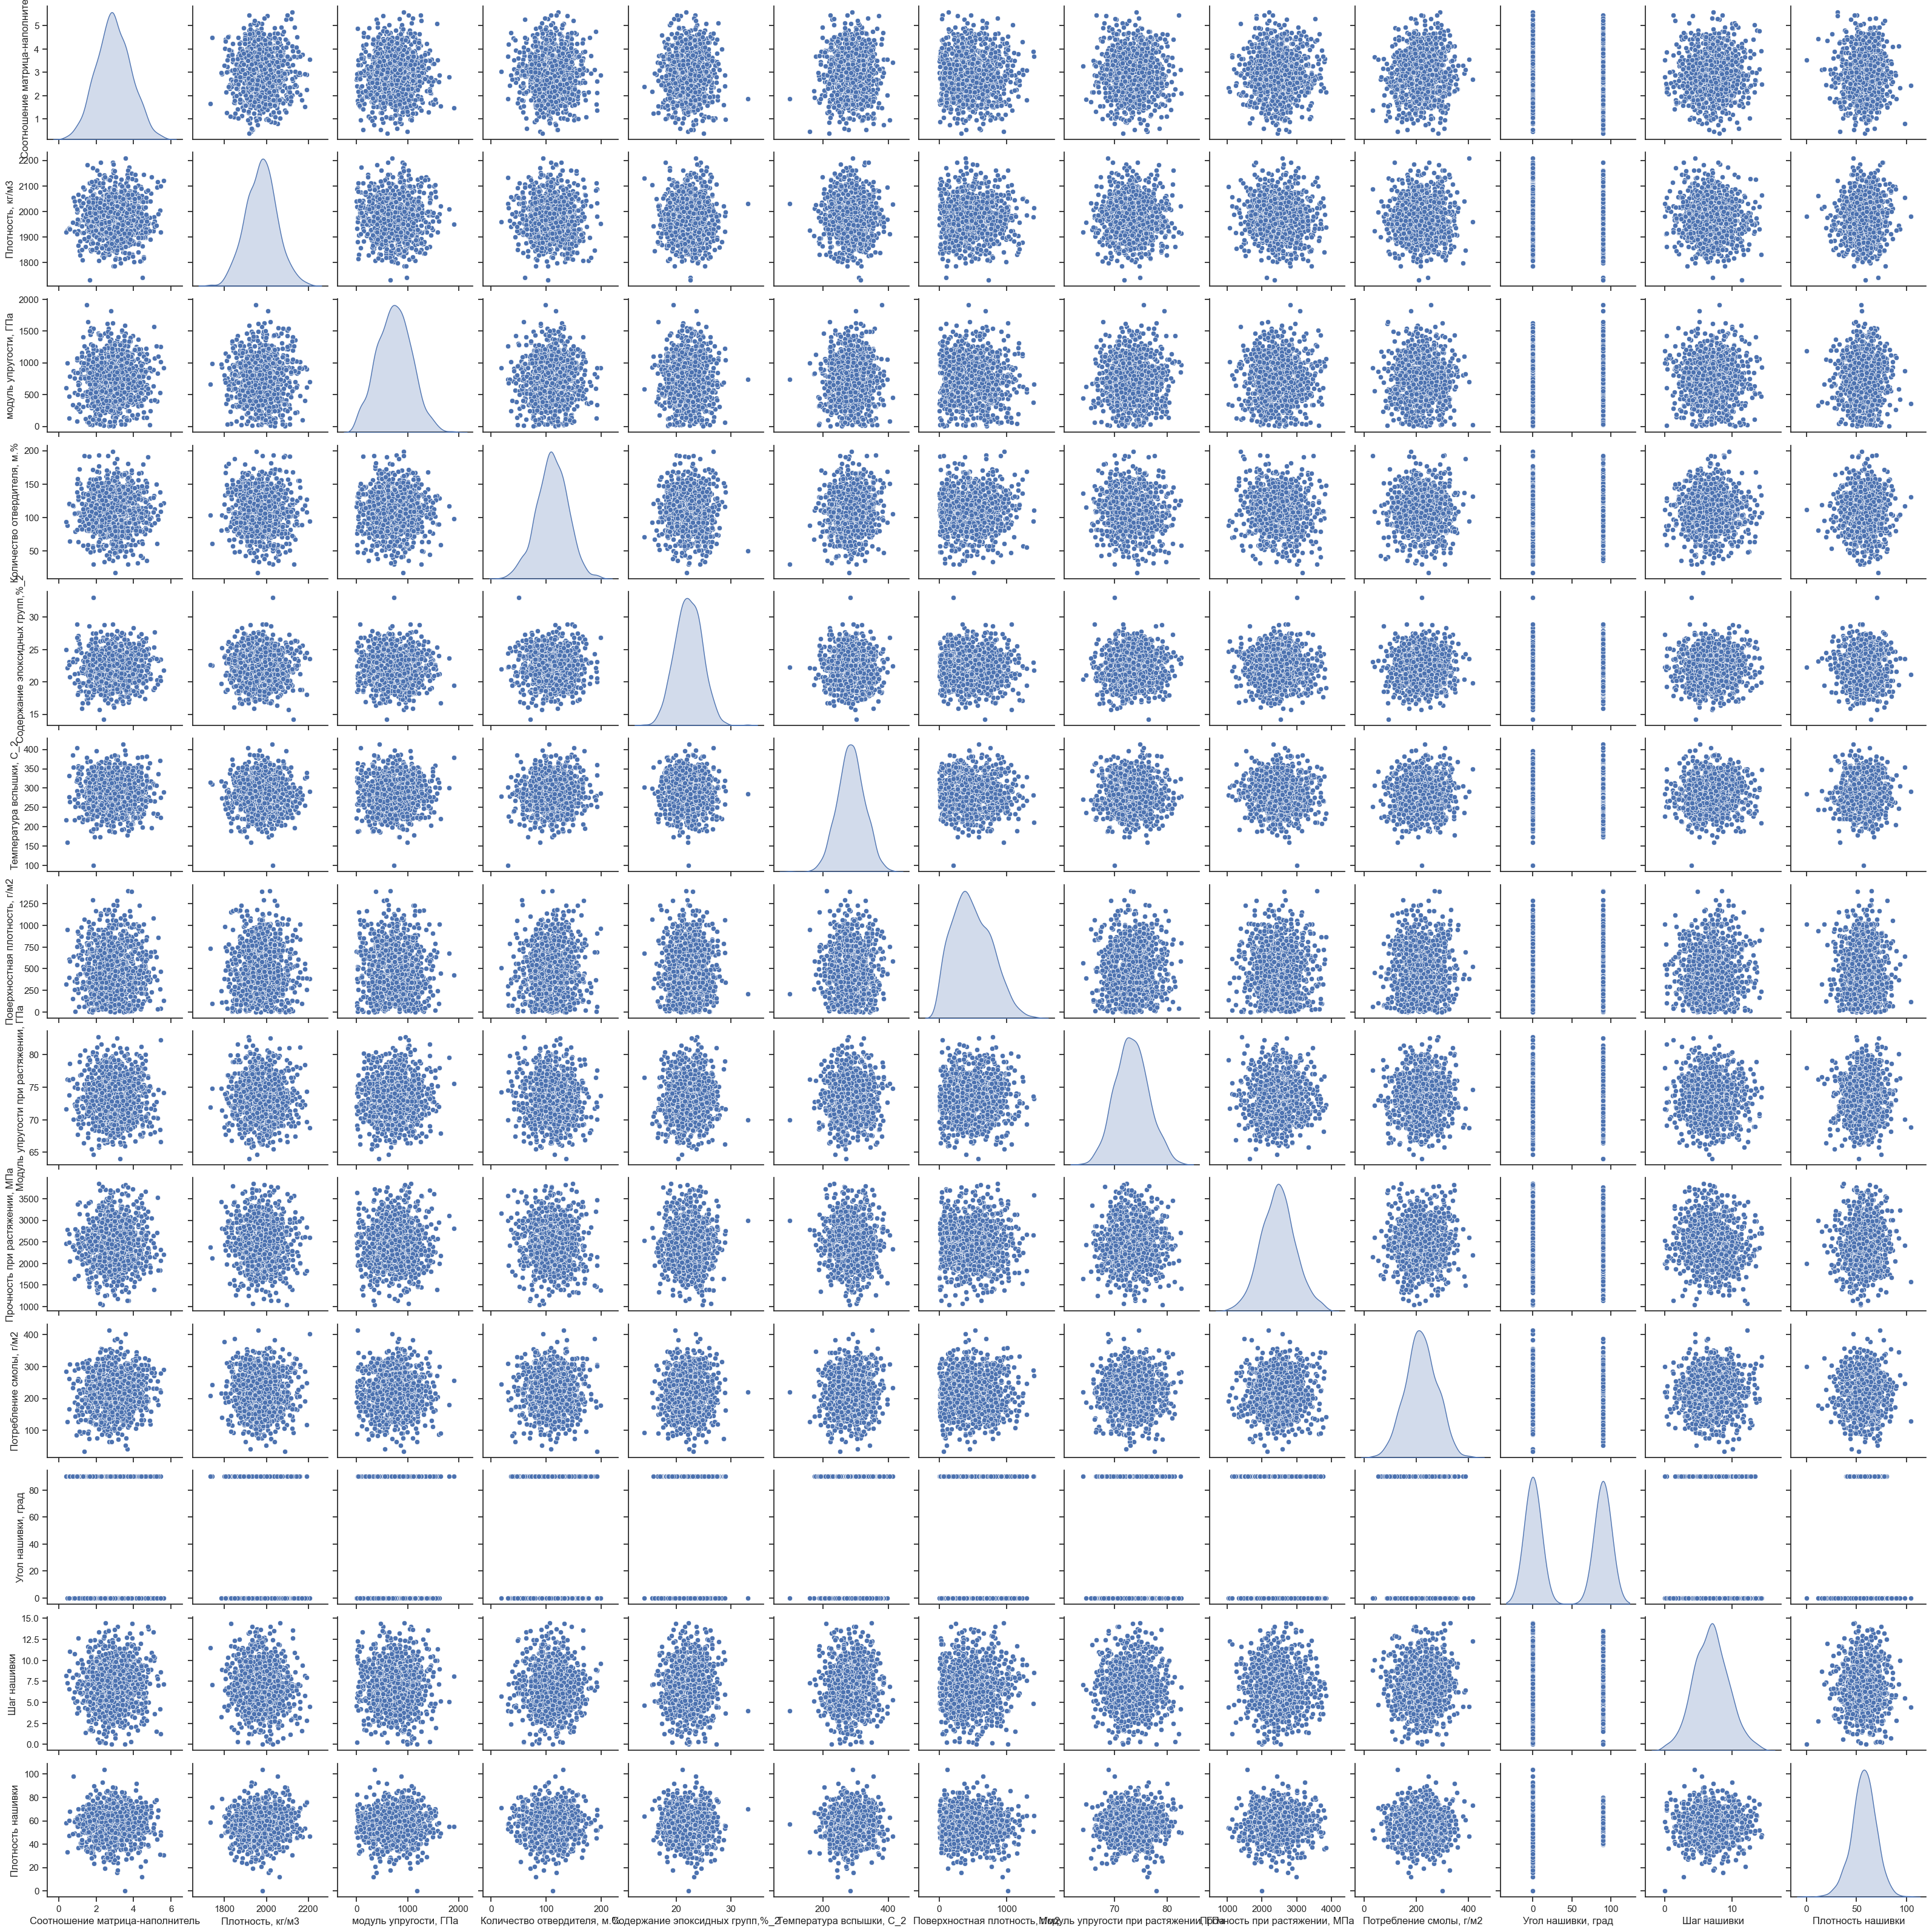

In [13]:
sns.pairplot(df, diag_kind='kde')
plt.show()

Данные зависят друг от друга скорее не линейно

<Figure size 1500x1500 with 0 Axes>

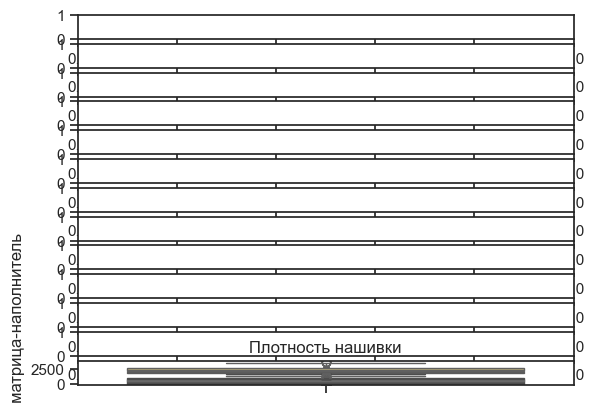

In [91]:
# fig = plt.figure()
plt.figure(figsize=(15,15))
figure, axis = plt.subplots(len(df.columns.tolist()), 1)
n=0
# ax = fig.add_subplot(111)
for column in df.columns.tolist():
    axis[n] = sns.boxplot(df[column])
    axis[n].set_title(column)
    # figure.add_subplot(bp)
    n+=1
plt.show()

In [102]:
columns = df.columns.tolist()

In [136]:
# plt.figure(figsize=(150,15))
fig, axis = plt.subplots(nrows=len(columns), ncols=1, figsize=(5, 75) )
# fig, axis = plt.subplots(nrows=4, ncols=4, figsize=(75, 55) )
x = 0
# y = 0

for column in columns:
    # if x >= 4:
    #     x = 0
    #     y += 1
    # axis[y, x].boxplot(df[column])
    # axis[y, x].set_title(column)
    axis[x].boxplot(df[column])
    axis[x].set_title(column)
    x+=1
plt.show()

In [18]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [Соотношение матрица-наполнитель, Плотность, кг/м3, модуль упругости, ГПа, Количество отвердителя, м.%, Содержание эпоксидных групп,%_2, Температура вспышки, С_2, Поверхностная плотность, г/м2, Модуль упругости при растяжении, ГПа, Прочность при растяжении, МПа, Потребление смолы, г/м2, Угол нашивки, град, Шаг нашивки, Плотность нашивки]
Index: []

In [23]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

In [22]:
df.describe().transpose()

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

### Заметка 1

Температура вспышки, С_2 = 100 - выброс?

In [61]:
df.loc[(df['Температура вспышки, С_2'] <= 190), 'Температура вспышки, С_2']

0      100.000000
244    187.562353
322    173.484920
332    188.918674
378    160.255843
563    187.977965
647    189.867078
721    173.973907
727    179.374391
832    186.508613
863    189.208392
Name: Температура вспышки, С_2, dtype: float64

In [64]:
df.loc[0]

Соотношение матрица-наполнитель            1.857143
Плотность, кг/м3                        2030.000000
модуль упругости, ГПа                    738.736842
Количество отвердителя, м.%               30.000000
Содержание эпоксидных групп,%_2           22.267857
Температура вспышки, С_2                 100.000000
Поверхностная плотность, г/м2            210.000000
Модуль упругости при растяжении, ГПа      70.000000
Прочность при растяжении, МПа           3000.000000
Потребление смолы, г/м2                  220.000000
Угол нашивки, град                         0.000000
Шаг нашивки                                4.000000
Плотность нашивки                         57.000000
Name: 0, dtype: float64

In [163]:
df.loc[(df['Температура вспышки, С_2'] == 100)]

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         30.0                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                     100.0                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0

In [165]:
df.loc[(df['Температура вспышки, С_2'] >= 400)]

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
791                         3.426368       2028.026074             453.458891   
938                         0.960288       1910.769529              80.081588   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
791                   105.674852                        22.415611   
938                   150.647888                        26.817201   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
791                413.273418                     586.715020   
938                403.652861                     756.286684   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
791                             74.838137                    2334.649515   
938                             75.547761                    2650.839969   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
791               233.293376                  90     5.256326   
938               307.937258                  90     6.885764   

     Плотность нашивки  
791          46.966045  
938          62.784927

### Предварительных ответ:
я бы пока не стал ее трогать ибо не особо понятно что это и почему не возможно
НО очень похоже на выброс ибо число очень уж круглое, относительно других

### Заметка 2

А не сделать ли этот параметр 0 и 1 ?

In [68]:
df['Угол нашивки, град'].unique()

array([ 0, 90], dtype=int64)

### Ответ:
Нет, ибо после нормализации он и так бинарен
### !!!   НО   ,   будет актуально при отсутсвии нормализации !!!

### Заметка 3 
Плотность нашивки 0 - не выброс ли?
или больше 95 ?

In [161]:
df.loc[(df['Плотность нашивки'] <= 10) | (df['Плотность нашивки'] >= 90 )]

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
19                          3.532338       1980.000000            1183.000000   
117                         4.136691       1944.518365             589.646853   
140                         0.790499       2054.123810             876.794802   
193                         2.348185       1929.677180             422.524663   
464                         2.440166       1980.132394             357.938256   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
19                    111.860000                        22.267857   
117                   102.349135                        19.580547   
140                   116.889391                        23.564969   
193                   104.737519                        23.645353   
464                   130.541848                        21.177094   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
19                 284.615385                    1010.000000   
117                247.744983                     371.247656   
140                353.561943                     643.647660   
193                305.799316                     554.507496   
464                290.618547                     119.756192   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
19                              78.000000                    2000.000000   
117                             80.075363                    2588.981282   
140                             70.080210                    2424.148613   
193                             76.436218                    3238.218206   
464                             68.900703                    1577.288189   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
19                300.000000                   0     0.000000   
117               346.276191                   0     7.190538   
140               247.193190                   0     5.506840   
193               273.174370                   0     9.992951   
464               129.038238                   0     4.447498   

     Плотность нашивки  
19            0.000000  
117          92.042139  
140          98.202603  
193          92.963492  
464         103.988901

### Предварительный ответ:
Да, 0 - это выброс, остальное хз

### Анализ Шага нашивки

In [164]:
df.loc[(df['Шаг нашивки'] >= 14)]

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
114                         3.153404       2019.552159            1063.742781   
392                         2.496519       2064.644261             933.835041   
446                         4.770073       1931.131457             516.692589   
529                         3.916135       1830.332164             471.506958   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
114                   146.035949                        23.695911   
392                   106.898372                        22.272400   
446                   101.364383                        21.538328   
529                   133.312208                        19.918813   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
114                295.731698                     822.311634   
392                348.049052                     950.685384   
446                301.310480                     168.376964   
529                209.999731                     241.219283   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
114                             70.648753                    2700.665341   
392                             74.886839                    2694.586007   
446                             70.910513                    2357.739620   
529                             73.519831                    2826.723248   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
114               194.238670                   0    14.051383   
392               330.728529                   0    14.440522   
446               198.668197                   0    14.033215   
529               304.184250                   0    14.376451   

     Плотность нашивки  
114          74.469002  
392          47.713362  
446          52.004279  
529          46.452598

### Предварительных вывод
Да вроде норм

### Заметка 4


## Try to ML

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [41]:
from sklearn.metrics import mean_absolute_error

In [38]:
y = df['Модуль упругости при растяжении, ГПа']
X = df.drop('Модуль упругости при растяжении, ГПа', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [152]:
col = df.columns.tolist()
col.remove('Модуль упругости при растяжении, ГПа')

In [155]:
ddf = pd.DataFrame(X_train, columns=col)
ddf.sample(5)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
481                         0.795063          0.868441               0.113347   
320                         0.614078          0.526958               0.263904   
298                         0.684519          0.375765               0.365231   
4                           0.564232          0.587681               0.627645   
272                         0.549202          0.683446               0.385182   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
481                     0.496338                         0.796601   
320                     0.317868                         0.747002   
298                     0.771401                         0.500585   
4                       0.475528                         0.281285   
272                     0.718967                         0.696099   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
481                  0.442423                       0.090255   
320                  0.605038                       0.248213   
298                  0.433935                       0.101811   
4                    0.642493                       0.187077   
272                  0.718238                       0.271112   

     Прочность при растяжении, МПа  Потребление смолы, г/м2  \
481                       0.558549                 0.441138   
320                       0.676227                 0.413132   
298                       0.497230                 0.601776   
4                         0.294792                 0.304572   
272                       0.474365                 0.428796   

     Угол нашивки, град  Шаг нашивки  Плотность нашивки  
481                 0.0     0.215501           0.433672  
320                 0.0     0.354383           0.334474  
298                 0.0     0.409122           0.538023  
4                   0.0     0.510821           0.619895  
272                 1.0     0.511202           0.606516

### RandomForestRegressor

In [51]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [52]:
# Передаем валидационные данные в пайплайн, получаем предсказания
preds = model.predict(X_test)

# Оцениваем точность модели
print('MAE:', mean_absolute_error(y_test, preds)) 

MAE: 2.667901992858875


### GradientBoostingRegressor

In [53]:
model = GradientBoostingRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [54]:
# Передаем валидационные данные в пайплайн, получаем предсказания
preds = model.predict(X_test)

# Оцениваем точность модели
print('MAE:', mean_absolute_error(y_test, preds)) 

MAE: 2.679948959949925


### LinearRegression

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# Передаем валидационные данные в пайплайн, получаем предсказания
preds = model.predict(X_test)

# Оцениваем точность модели
print('MAE:', mean_absolute_error(y_test, preds)) 

MAE: 2.582382865010614


## Try to create NN